## Name and ID
* Name: Lexi Shewchuk (ashewc01)
* ID: 1331654

## HW05 Code


You will complete the following notebook, as described in the PDF for Homework 05 (included in the download with the starter code).  You will submit:
1. This notebook file, along with your COLLABORATORS.txt file and the two tree images (PDFs generated using `graphviz` within the code), to the Gradescope link for code.
2. A PDF of this notebook and all of its output, once it is completed, to the Gradescope link for the PDF.


Please report any questions to the [class Piazza page](https://piazza.com/tufts/spring2021/comp135).

### Import required libraries.

In [28]:
import numpy as np
import pandas as pd

import sklearn.tree
import graphviz

## Decision Trees

You should start by computing the two heuristic values for the toy data described in the assignment handout. You should then load the two versions of the abalone data, compute the two heuristic values on features (for the simplified data), and then build decision trees for each set of data.

### 1 Compute both heuristics for toy data.

#### (a) Compute the counting-based heuristic, and order the features by it.

In [29]:
#          A                                       B
#        /   \                                   /   \
#    True     False                           True   False
#   100% O     33% O                         75% O     25% O
#   0%   X     67% X                         25% X     75% X
#       
# If A = True,  guess O                    If B = True,  guess O
#    A = False, guess X                       B = False, guess X
#
# correct:                                 correct:
#   A = True:  2/2                           B = True:  3/4
#   A = False: 4/6                           B = False: 3/4
# score = 6/8                              score = 6/8

def score(X_t, O_t, X_f, O_f):
    score = 0

    percent_t_X = X_t / (X_t + O_t)
    percent_t_O = O_t / (X_t + O_t)
    if percent_t_X > percent_t_O:
        score += X_t
    else:
        score += O_t

    percent_f_X = X_f / (X_f + O_f)
    percent_f_O = O_f / (X_f + O_f)
    if percent_f_X > percent_f_O:
        score += X_f
    else:
        score += O_f
    
    return score
    


print('A: {}/{}'.format(score(0, 2, 4, 2), 8))
print('B: {}/{}'.format(score(1, 3, 3, 1), 8))

A: 6/8
B: 6/8


#### (b) Compute the information-theoretic heuristic, and order the features by it.

In [30]:
import math

def entropy(num_X, num_O):
    total = num_X + num_O
    X_prop = num_X/total if num_X > 0 else 1
    O_prop = num_O/total if num_O > 0 else 1
    return -1 * (num_X/total*math.log(X_prop, 2) + num_O/total * math.log(O_prop, 2))

def gain(X_t, O_t, X_f, O_f):
    total = X_t + X_f + O_t + O_f
    remainder = (X_t + O_t) / total * entropy(X_t, O_t) + (X_f + O_f) / total * entropy(X_f, O_f)
    return entropy(X_t + X_f, O_t + O_f) - remainder

print('A:', gain(0, 2, 4, 2))
print('B:', gain(1, 3, 3, 1))

A: 0.31127812445913283
B: 0.18872187554086717


#### (c) Discussion of results.

The counting heuristic from part (a) is going to build a less efficient tree than the heuristic from part (b). In part (a), we get equal proportions -- that is, 6 of 8 data will be correctly labeled after the first level by taking the most frequent classification given a condition, whether you choose A or B as the first feature. In part (b), we gain more information by choosing A as the first feature, because you narrow down the O class.

### 2 Compute both heuristics for simplified abalone data.

In [31]:
x_train = pd.read_csv('data_abalone/x_train.csv')
y_train = pd.read_csv('data_abalone/y_train.csv')
x_test = pd.read_csv('data_abalone/x_test.csv')
y_test = pd.read_csv('data_abalone/y_test.csv')

small_x_train = pd.read_csv('data_abalone/small_binary_x_train.csv')
small_y_train = pd.read_csv('data_abalone/3class_y_train.csv')
small_x_test = pd.read_csv('data_abalone/small_binary_x_test.csv')
small_y_test = pd.read_csv('data_abalone/3class_y_test.csv')

#### (a) Compute the counting-based heuristic, and order the features by it.

In [32]:
# based on the most frequent classification given a feature value,
# classify the example

# start by figuring out the number of each class in a given feature value 
num_features = len(small_x_train.columns)
cols = list(small_x_train.columns)
f_c = [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
for i in range(len(small_x_train)):
    for f in cols:
    # zero branch
    # X_t, O_t, X_f, O_f
        if small_x_train.at[i, f] == 0 and small_y_train.at[i, 'rings'] == 0:      # feature is 0, output is 0
            f_c[cols.index(f)][0] += 1
        elif small_x_train.at[i, f] == 0 and small_y_train.at[i, 'rings'] == 1:    # feature is 0, output is 1
            f_c[cols.index(f)][1] += 1
        elif small_x_train.at[i, f] == 1 and small_y_train.at[i, 'rings'] == 0:    # feature is 1, output is 0
            f_c[cols.index(f)][2] += 1
        elif small_x_train.at[i, f] == 1 and small_y_train.at[i, 'rings'] == 1:    # feature is 1, output is 1
            f_c[cols.index(f)][3] += 1

# get the score for each value, then sort by that value
scores = {}
for f in cols:
    i = cols.index(f)
    scores[f] = score(f_c[i][0], f_c[i][1], f_c[i][2], f_c[i][3])
scores = dict(sorted(scores.items(), key=lambda x: x[1], reverse=True))

# print values
for i in scores:
    print('{}: {}/{}'.format(i, scores[i], len(small_x_train)))

height_mm: 2316/3176
diam_mm: 2266/3176
length_mm: 2230/3176
is_male: 1864/3176


#### (b) Compute the information-theoretic heuristic, and order the features by it.

In [33]:
# get the score for each value, then sort by that value
scores = {}
for f in cols:
    i = cols.index(f)
    scores[f] = gain(f_c[i][0], f_c[i][1], f_c[i][2], f_c[i][3])
scores = dict(sorted(scores.items(), key=lambda x: x[1], reverse=True))

# print values
for i in scores:
    print('{}: {}/{}'.format(i, scores[i], len(small_x_train)))

height_mm: 0.170038221123736/3176
diam_mm: 0.14799402907724246/3176
length_mm: 0.13336348846054447/3176
is_male: 0.024345033042779685/3176


### 3 Generate decision trees for full- and restricted-feature data

#### (a) Print accuracy values and generate tree images.

small data score:  0.722
big data score:  0.19319999999999998
big data with max nodes = 45:  0.28


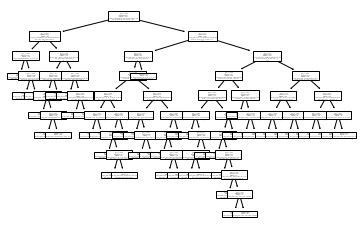

In [105]:
# get average score (average because of RandomState)
small_scores = list()
big_scores = list()
big_scores_max_nodes = list()

for rand in range(5):
    small_tree_classifier = sklearn.tree.DecisionTreeClassifier(criterion='entropy')
    small_tree_classifier.fit(small_x_train, small_y_train)
    small_scores.append(small_tree_classifier.score(small_x_test, small_y_test))
      
    big_tree_classifier = sklearn.tree.DecisionTreeClassifier(criterion='entropy')
    big_tree_classifier.fit(x_train, y_train)
    big_scores.append(big_tree_classifier.score(x_test, y_test))
    
    big_tree_classifier_max_nodes = sklearn.tree.DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=45)
    big_tree_classifier_max_nodes.fit(x_train, y_train)
    big_scores_max_nodes.append(big_tree_classifier_max_nodes.score(x_test, y_test))
    
print('small data score: ', np.mean(small_scores))
print('big data score: ', np.mean(big_scores))
print('big data with max nodes = 45: ', np.mean(big_scores_max_nodes))


sklearn.tree.plot_tree(small_tree_classifier)
sklearn.tree.export_graphviz(small_tree_classifier);
graph_data = sklearn.tree.export_graphviz(small_tree_classifier, out_file=None, filled=True, rounded=True) 
graph = graphviz.Source(graph_data)

# sklearn.tree.plot_tree(big_tree_classifier)
# sklearn.tree.export_graphviz(big_tree_classifier);
# graph_data = sklearn.tree.export_graphviz(big_tree_classifier, out_file=None, filled=True, rounded=True) 
# graph = graphviz.Source(graph_data)

sklearn.tree.plot_tree(big_tree_classifier_max_nodes)
sklearn.tree.export_graphviz(big_tree_classifier_max_nodes);
graph_data = sklearn.tree.export_graphviz(big_tree_classifier_max_nodes, out_file=None, filled=True, rounded=True) 
graph = graphviz.Source(graph_data)

#### (b) Discuss the results seen for the two trees

The smaller, binary data can be predicted much better. 